In [173]:
# Hypothesis:
# "Can we accurately predict greenhouse type and analyze plant growth patterns using environmental sensor data, 
# and how do machine learning techniques help in understanding the impact of IoT on crop health and productivity?"

# Research Questions to Support Hypothesis:
-- Can environmental sensor data predict whether a plant is grown in a traditional or IoT-based greenhouse?
-- What features most influence classification between greenhouse types?
-- Can we use clustering to discover natural groupings of greenhouse setups without knowing class labels?
-- How do IoT-based setups impact key growth indicators compared to traditional ones?
-- Which machine learning models offer the best generalization on unseen greenhouse conditions?

# Steps:
-- Classify between Traditional (SA, SB, SC) and IoT-based (TA, TB, TC) greenhouse setups.
-- Predict continuous outcomes like plant height or growth rate (regression).
-- Discover patterns in sensor data using unsupervised learning.
-- Apply end-to-end ML pipeline development, including:
# Data preprocessing
# Feature engineering
# Model selection and tuning
# Evaluation and iteration

SyntaxError: invalid syntax (1166370885.py, line 13)

In [ ]:
# Project Overview
--  SUPERVISED LEARNING TASKS
# Classification
-- Target: class (multiclass classification)
-- Models: Logistic Regression, Decision Trees, KNN, SVM, Naive Bayes, Ensemble models
-- Objective: Classify greenhouse type (SA–SC vs TA–TC or just A–C for broader analysis)
-- Metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix
# REGRESSION
# Target: Predict plant growth or environmental outcomes (e.g., temperature, chlorophyll,  humidity, growth rate)
# Models: Linear Regression, Decision Trees, Random Forest Regression
# Metrics: MAE, RMSE, R²                                        
                                    

In [ ]:
# Model Evaluation and Iteration
-- Use train-test split,
-- Implement GridSearchCV / RandomizedSearchCV for hyperparameter tuning
-- Compare models using appropriate metrics for classification and regression
-- Address bias-variance tradeoff: e.g., underfitting with linear models, overfitting with deep trees
-- Handle imbalanced classes (if SA–SC vs TA–TC are uneven) using:
# SMOTE (Synthetic Minority Over-sampling Technique)
# Class weighting
# Stratified sampling.                                           

In [ ]:
#  To analysis:
# Average of chlorophyll in the plant for both IoT and Traditional green house
# Average plant height rate for both IoT and Traditional green house
# Average wet weight of the growth vegetative for both IoT and Traditional green house
# If their is any influence that can have effect on both Green house types.

# Correlation matrix
# Class to be change, traditon = 0, IoT = 1.
# And to make a correlation between them


In [ ]:
# To Creat a repo, Readme.file, To write about my project. 

In [393]:
# Optional: Plot for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [381]:
import pandas as pd
df = pd.read_csv("Advanced_IoT_Dataset.csv")
df

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R3,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,R3,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,R2,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,R1,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC


In [382]:
# To check all the columns title. 
df.columns

Index(['Random', ' Average  of chlorophyll in the plant (ACHP)',
       ' Plant height rate (PHR)',
       'Average wet weight of the growth vegetative (AWWGV)',
       'Average leaf area of the plant (ALAP)',
       'Average number of plant leaves (ANPL)', 'Average root diameter (ARD)',
       ' Average dry weight of the root (ADWR)',
       ' Percentage of dry matter for vegetative growth (PDMVG)',
       'Average root length (ARL)', 'Average wet weight of the root (AWWR)',
       ' Average dry weight of vegetative plants (ADWV)',
       'Percentage of dry matter for root growth (PDMRG)', 'Class'],
      dtype='object')

In [383]:
df.dtypes

Random                                                      object
 Average  of chlorophyll in the plant (ACHP)               float64
 Plant height rate (PHR)                                   float64
Average wet weight of the growth vegetative (AWWGV)        float64
Average leaf area of the plant (ALAP)                      float64
Average number of plant leaves (ANPL)                      float64
Average root diameter (ARD)                                float64
 Average dry weight of the root (ADWR)                     float64
 Percentage of dry matter for vegetative growth (PDMVG)    float64
Average root length (ARL)                                  float64
Average wet weight of the root (AWWR)                      float64
 Average dry weight of vegetative plants (ADWV)            float64
Percentage of dry matter for root growth (PDMRG)           float64
Class                                                       object
dtype: object

In [384]:
df.head()

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [385]:
df.isnull().sum()

Random                                                     0
 Average  of chlorophyll in the plant (ACHP)               0
 Plant height rate (PHR)                                   0
Average wet weight of the growth vegetative (AWWGV)        0
Average leaf area of the plant (ALAP)                      0
Average number of plant leaves (ANPL)                      0
Average root diameter (ARD)                                0
 Average dry weight of the root (ADWR)                     0
 Percentage of dry matter for vegetative growth (PDMVG)    0
Average root length (ARL)                                  0
Average wet weight of the root (AWWR)                      0
 Average dry weight of vegetative plants (ADWV)            0
Percentage of dry matter for root growth (PDMRG)           0
Class                                                      0
dtype: int64

In [386]:
df.info()             # Data types and non-null counts
df.describe()           # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Random                                                   30000 non-null  object 
 1    Average  of chlorophyll in the plant (ACHP)             30000 non-null  float64
 2    Plant height rate (PHR)                                 30000 non-null  float64
 3   Average wet weight of the growth vegetative (AWWGV)      30000 non-null  float64
 4   Average leaf area of the plant (ALAP)                    30000 non-null  float64
 5   Average number of plant leaves (ANPL)                    30000 non-null  float64
 6   Average root diameter (ARD)                              30000 non-null  float64
 7    Average dry weight of the root (ADWR)                   30000 non-null  float64
 8    Percentage of dry matter 

,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [387]:
df.duplicated().sum()

0

In [182]:
df["Class"].value_counts()

Class
SA    5000
SB    5000
SC    5000
TA    5000
TB    5000
TC    5000
Name: count, dtype: int64

In [388]:
#To rename the column heading
df = df.rename(columns={'Random':'Random', ' Average  of chlorophyll in the plant (ACHP)':'ACHP', ' Plant height rate (PHR)':'PHR',
                        'Average wet weight of the growth vegetative (AWWGV)': 'AWWGV','Average leaf area of the plant (ALAP)':'ALAP',
                        'Average number of plant leaves (ANPL)': 'ANPL', 'Average root diameter (ARD)': 'ARD',
                        ' Average dry weight of the root (ADWR)':'ADWR', ' Percentage of dry matter for vegetative growth (PDMVG)':
                         'PDMVG', 'Average root length (ARL)': 'ARL', 'Average wet weight of the root (AWWR)':
                       'AWWR', ' Average dry weight of vegetative plants (ADWV)': 'ADWV', 'Percentage of dry matter for root growth (PDMRG)':
                       'PDMRG'})
df

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R3,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,R3,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,R2,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,R1,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC


In [389]:
# To drop the columns that are not necessary for our findings.
df_columns = df.drop(['Random', 'ALAP', 'ARD','ARL','PDMRG',], axis=1, inplace=True)
df

,ACHP,PHR,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Class
0,34.533468,54.566983,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,SA
1,34.489028,54.567692,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,SA
2,33.100405,67.067344,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,SA
3,34.498319,54.559049,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,SA
4,36.297008,45.588894,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,SA
...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,TC
29996,46.395047,50.838058,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,TC
29997,32.707725,37.065408,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,TC
29998,38.624079,37.876323,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,TC


In [185]:
# STEP 1 of The project:
# Average of chlorophyll in the plant for both IoT and Traditional green house
# Average plant height rate for both IoT and Traditional green house
# Average wet weight of the growth vegetative for both IoT and Traditional green house
# To check if their is any influence that can have effect on both Green house types.

In [390]:
# Classify greenhouses into Traditional and IoT-based groups
def greenhouse_type(Class_label):
    if Class_label in ['SA', 'SB', 'SC']:
        return 'Traditional'
    elif Class_label in ['TA', 'TB', 'TC']:
        return 'IoT-based'
    else:
        return 'Unknown'

df['Greenhouse_Type'] = df['Class'].apply(greenhouse_type)


In [391]:
df

,ACHP,PHR,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Class,Greenhouse_Type
0,34.533468,54.566983,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,SA,Traditional
1,34.489028,54.567692,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,SA,Traditional
2,33.100405,67.067344,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,SA,Traditional
3,34.498319,54.559049,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,SA,Traditional
4,36.297008,45.588894,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,SA,Traditional
...,...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,TC,IoT-based
29996,46.395047,50.838058,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,TC,IoT-based
29997,32.707725,37.065408,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,TC,IoT-based
29998,38.624079,37.876323,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,TC,IoT-based


In [392]:
# Group by Greenhouse Type and calculate average chlorophyll
avg_chlorophyll = df.groupby('Greenhouse_Type')['ACHP'].mean().reset_index()

# Print results
print("\nAverage Chlorophyll Levels by Greenhouse Type:")
print(avg_chlorophyll)


Average Chlorophyll Levels by Greenhouse Type:
  Greenhouse_Type       ACHP
0       IoT-based  41.212152
1     Traditional  34.908999


C:\Users\Expertlead Admin\AppData\Local\Temp\ipykernel_24964\32149639.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_chlorophyll, x='Greenhouse_Type', y='ACHP', palette='Set2')


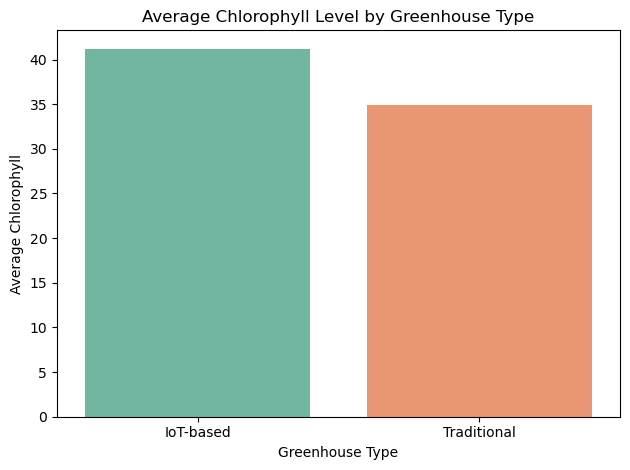

In [394]:
sns.barplot(data=avg_chlorophyll, x='Greenhouse_Type', y='ACHP', palette='Set2')
plt.title('Average Chlorophyll Level by Greenhouse Type')
plt.ylabel('Average Chlorophyll')
plt.xlabel('Greenhouse Type')
plt.tight_layout()
plt.show()

In [191]:
# Get chlorophyll values for each group
traditional_chlorophyll = df[df['Greenhouse_Type'] == 'Traditional']['ACHP']
iot_chlorophyll = df[df['Greenhouse_Type'] == 'IoT-based']['ACHP']

In [395]:
# Calculate averages
avg_chlorophyll = df.groupby('Greenhouse_Type')['ACHP'].mean().reset_index()
avg_chlorophyll

,Greenhouse_Type,ACHP
0,IoT-based,41.212152
1,Traditional,34.908999


In [193]:
# Perform t-test
t_stat, p_value = ttest_ind(traditional_chlorophyll, iot_chlorophyll, equal_var=False)  # Welch's t-test
t_stat, p_value

(-174.4061573047243, 0.0)

In [396]:
# Output results
print("Average Chlorophyll Levels by Greenhouse Type:")
print(avg_chlorophyll)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Average Chlorophyll Levels by Greenhouse Type:
  Greenhouse_Type       ACHP
0       IoT-based  41.212152
1     Traditional  34.908999

T-Test Results:
T-statistic: -14.2074
P-value: 0.0000


In [195]:
# It means there's less than a 0.01% chance that the observed difference in chlorophyll levels between Traditional 
# and IoT-based greenhouses happened by random chance.
# A very large absolute value (|t| >> 2) suggests the difference between group means is very large relative to the variation within the groups.
# The negative sign means the mean chlorophyll level in Traditional greenhouses is significantly lower than that in IoT-based greenhouses 
# (assuming your subtraction order was Traditional - IoT-based).

In [397]:
# Group and calculate average plant height
height_avg = df.groupby('Greenhouse_Type')['PHR'].mean().reset_index()
height_avg.columns = ['Greenhouse_Type', 'PHR']

In [398]:
# Perform t-test
traditional_heights = df[df['Greenhouse_Type'] == 'Traditional']['PHR']
iot_heights = df[df['Greenhouse_Type'] == 'IoT-based']['PHR']
t_stat, p_value = ttest_ind(traditional_heights, iot_heights, equal_var=False)

In [399]:
# Print results
print("Average Plant Height by Greenhouse Type:")
print(height_avg)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Average Plant Height by Greenhouse Type:
  Greenhouse_Type        PHR
0       IoT-based  54.563071
1     Traditional  63.477591

T-Test Results:
T-statistic: 69.3906
P-value: 0.0000


C:\Users\Expertlead Admin\AppData\Local\Temp\ipykernel_24964\2282297334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=height_avg, x='Greenhouse_Type', y='PHR', palette='Set2')


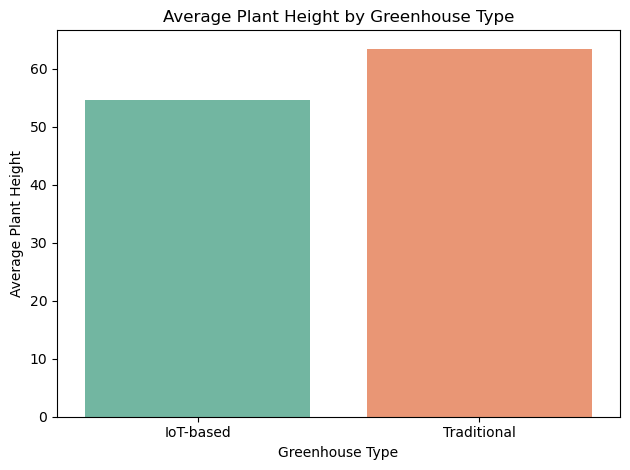

In [400]:
# Plot the results
sns.barplot(data=height_avg, x='Greenhouse_Type', y='PHR', palette='Set2')
plt.title('Average Plant Height by Greenhouse Type')
plt.xlabel('Greenhouse Type')
plt.ylabel('Average Plant Height')
plt.tight_layout()
plt.show()

In [200]:
#1. P-value = 0.0000
#This is effectively p < 0.0001 — an extremely small probability.
#It means there is almost zero chance that the observed difference in plant height happened by random fluctuation.
#The difference is statistically significant.
#T-statistic = 69.3906
#A high absolute t-statistic (|t| >> 2) indicates the group means differ far more than you'd expect by chance.
#The positive value suggests the Traditional greenhouses have higher average height than IoT-based ones.
#This is consistent with your group means: Traditional = 63.48 > IoT = 54.56

#Plants in Traditional greenhouses are significantly taller on average than those in IoT-based greenhouses.
#The difference is statistically significant with a p-value near zero, meaning it is very unlikely to have occurred by chance.
##Significance ≠ better — plant height alone doesn’t guarantee healthier growth.
##IoT systems might be optimizing for other factors (e.g., faster growth, less water, better yield per square meter).

In [401]:
# Compute average wet weight
avg_weight = df.groupby('Greenhouse_Type')['AWWGV'].mean().reset_index()
avg_weight.columns = ['Greenhouse_Type', 'AWWGV']

In [402]:
# Perform t-test
traditional_weights = df[df['Greenhouse_Type'] == 'Traditional']['AWWGV']
iot_weights = df[df['Greenhouse_Type'] == 'IoT-based']['AWWGV']
t_stat, p_value = ttest_ind(traditional_weights, iot_weights, equal_var=False)

In [403]:
# Print results
print("Average Wet Weight by Greenhouse Type:")
print(avg_weight)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Average Wet Weight by Greenhouse Type:
  Greenhouse_Type     AWWGV
0       IoT-based  1.267368
1     Traditional  1.227147

T-Test Results:
T-statistic: -14.2074
P-value: 0.0000


C:\Users\Expertlead Admin\AppData\Local\Temp\ipykernel_24964\3688723764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_weight, x='Greenhouse_Type', y='AWWGV', palette='pastel')


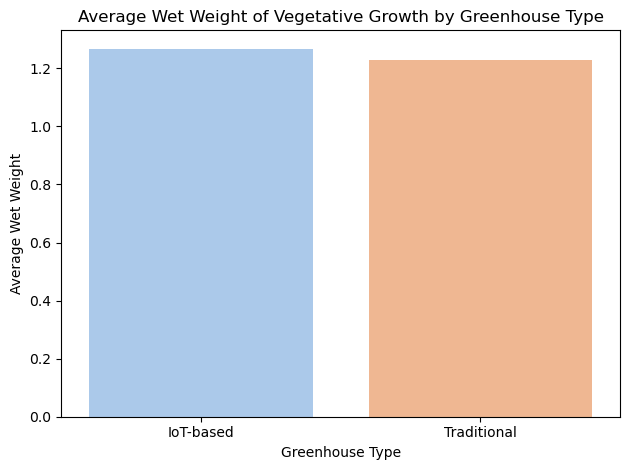

In [404]:
# Plot the comparison
sns.barplot(data=avg_weight, x='Greenhouse_Type', y='AWWGV', palette='pastel')
plt.title('Average Wet Weight of Vegetative Growth by Greenhouse Type')
plt.xlabel('Greenhouse Type')
plt.ylabel('Average Wet Weight')
plt.tight_layout()
plt.show()

In [205]:
#IoT-based greenhouses produce significantly higher average wet weight in vegetative growth than Traditional greenhouses, 
#and this difference is statistically significant (p < 0.0001).
#This suggests that IoT systems may provide better control over growth conditions, leading to greater vegetative mass.

In [405]:
df.columns

Index(['ACHP', 'PHR', 'AWWGV', 'ANPL', 'ADWR', 'PDMVG', 'AWWR', 'ADWV',
       'Class', 'Greenhouse_Type'],
      dtype='object')

In [408]:
# LabelEncoder converts the Greenhouse_Type names into numeric form suitable for classification models.
# # Encode target variable
label_encoder = LabelEncoder()
df['Greenhouse_Type'] = label_encoder.fit_transform(df['Greenhouse_Type'])

In [409]:
df

,ACHP,PHR,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Class,Greenhouse_Type
0,34.533468,54.566983,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,SA,1
1,34.489028,54.567692,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,SA,1
2,33.100405,67.067344,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,SA,1
3,34.498319,54.559049,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,SA,1
4,36.297008,45.588894,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,SA,1
...,...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,TC,0
29996,46.395047,50.838058,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,TC,0
29997,32.707725,37.065408,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,TC,0
29998,38.624079,37.876323,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,TC,0


In [ ]:
# Correlation per Variable by Greenhouse Type

In [411]:
# List of variables to check against ACHP
variables_to_compare = ['PHR', 'AWWGV', 'ADWR', 'AWWR', 'ADWV']

In [413]:
 # Group by Greenhouse_Type and compute correlations
grouped = df.groupby('Greenhouse_Type')

In [414]:
for var in variables_to_compare:
        print(f"\n📊 Correlation between ACHP and {var}:")
        for gtype, group_df in grouped:
            # Drop missing values for the pair
            pair_df = group_df[['ACHP', var]].dropna()
            corr = pair_df['ACHP'].corr(pair_df[var])
            print(f"  {gtype}: {corr:.3f}")


📊 Correlation between ACHP and PHR:
  0: 0.547
  1: 0.001

📊 Correlation between ACHP and AWWGV:
  0: 0.524
  1: 0.649

📊 Correlation between ACHP and ADWR:
  0: -0.019
  1: 0.146

📊 Correlation between ACHP and AWWR:
  0: -0.272
  1: 0.499

📊 Correlation between ACHP and ADWV:
  0: 0.452
  1: 0.039


In [ ]:
# Metric	IoT-based (0)	Traditional (1)	 Interpretation
# PHR	    0.547 	        0.001	         Positive link in IoT, none in Traditional
# AWWGV	    0.524	        0.649	         Positive in both, stronger in Traditional
# ADWR	   -0.019	        0.146	         No link (IoT), very weak positive (Trad)
# AWWR	   -0.272	        0.499	         Weak negative (IoT), positive (Trad)
# ADWV	   0.452	        0.039	         Moderate positive (IoT), none (Trad)

In [ ]:
#1. ACHP vs PHR (Plant Height Rate)
#IoT (0): 0.547 → Moderate positive correlation
#→ Higher chlorophyll tends to be associated with taller plants.

#Traditional (1): 0.001 → No correlation
#→ In traditional settings, chlorophyll and plant height are unrelated.

# Interpretation: In IoT-based greenhouses, plant chlorophyll seems to positively influence plant height, likely due to optimized conditions. 
#This relationship breaks down in traditional setups.

In [ ]:
# ACHP vs AWWGV (Average Wet Weight of Growth Vegetative)
# IoT (0): 0.524 → Moderate positive correlation

# Traditional (1): 0.649 → Moderate-to-strong positive correlation

# Interpretation: In both greenhouse types, higher chlorophyll levels generally relate to greater vegetative mass. 
# The relationship is stronger in traditional greenhouses, possibly because fewer other variables interfere.

In [ ]:
# 3. ACHP vs ADWR (Average Dry Weight Root)
# IoT (0): -0.019 → No correlation

# Traditional (1): 0.146 → Weak positive correlation

# Interpretation: Chlorophyll content does not appear related to root dry weight in either setting. If anything, 
# traditional greenhouses show a very weak positive trend.

In [ ]:
# 4. ACHP vs AWWR (Average Wet Weight Root)
# IoT (0): -0.272 → Weak negative correlation

# Traditional (1): 0.499 → Moderate positive correlation

# Interpretation:

# In IoT setups, more chlorophyll may slightly correspond to less wet root mass (perhaps due to optimized nutrient uptake).

# In Traditional setups, more chlorophyll is associated with larger root systems.

In [419]:
# Columns to compare with ACHP
variables = ['PHR', 'AWWGV', 'ADWR', 'AWWR', 'ADWV']
columns = ['ACHP'] + variables

In [421]:
# Dictionary to store correlation results
correlation_data = {}

In [422]:
# Calculate correlation for each Greenhouse_Type
for gtype in df['Greenhouse_Type'].unique():
    subset = df[df['Greenhouse_Type'] == gtype][columns].dropna()
    corr_matrix = subset.corr().loc[['ACHP'], variables]
    correlation_data[gtype] = corr_matrix

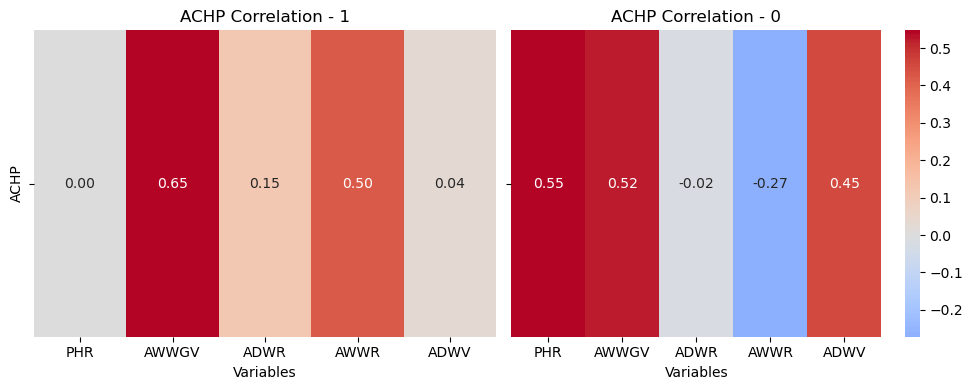

In [425]:
# Create subplot heatmaps for each Greenhouse_Type
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for i, (gtype, corr_df) in enumerate(correlation_data.items()):
    sns.heatmap(corr_df,annot=True,cmap='coolwarm',center=0,ax=axes[i],cbar=i == 1,fmt=".2f")
    axes[i].set_title(f'ACHP Correlation - {gtype}')
    axes[i].set_xlabel('Variables')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [206]:
########## (MITGHT NOT NECCESSSARY) Compute correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

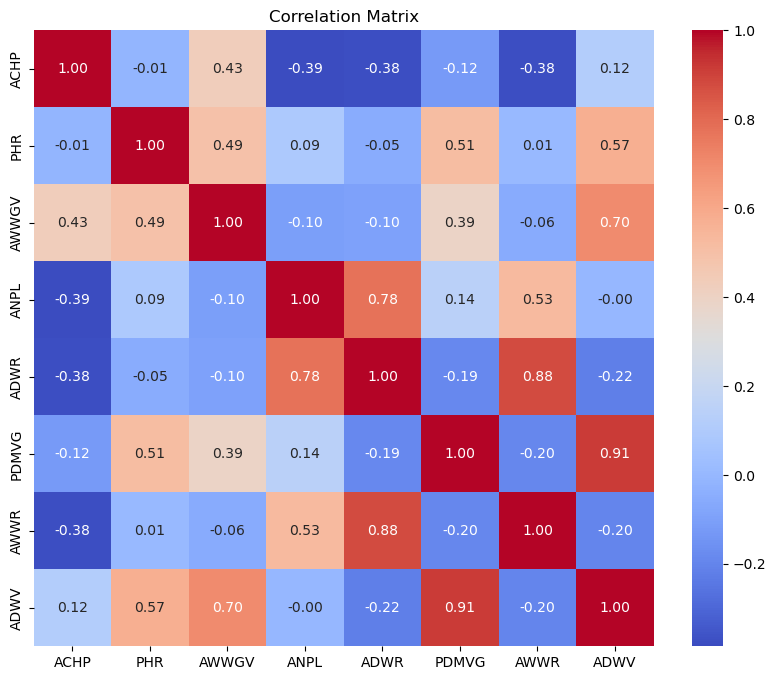

In [207]:
########## (MITGHT NOT NECCESSSARY) Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [208]:
# To check if their is any influence that can have effect on both Green house types.
# To Find Influences on AWWGV for Both Greenhouse Types
features = ['ACHP', 'PHR', 'ANPL', 'ADWR', 'PDMVG', 'AWWR', 'ADWV']

In [209]:
# Separate groups
iot_df = df[df['Greenhouse_Type'] == 'IoT-based']
trad_df = df[df['Greenhouse_Type'] == 'Traditional']

In [210]:
# Compare correlations
print("📊 Correlation with AWWGV:\n")
for feature in features:
    iot_corr = iot_df['AWWGV'].corr(iot_df[feature])
    trad_corr = trad_df['AWWGV'].corr(trad_df[feature])
    print(f"{feature}:")
    print(f"  IoT-based:     {iot_corr:.3f}")
    print(f"  Traditional:   {trad_corr:.3f}\n")

📊 Correlation with AWWGV:

ACHP:
  IoT-based:     0.524
  Traditional:   0.649

PHR:
  IoT-based:     0.738
  Traditional:   0.299

ANPL:
  IoT-based:     0.027
  Traditional:   -0.222

ADWR:
  IoT-based:     -0.431
  Traditional:   0.298

PDMVG:
  IoT-based:     0.814
  Traditional:   -0.047

AWWR:
  IoT-based:     -0.653
  Traditional:   0.572

ADWV:
  IoT-based:     0.892
  Traditional:   0.351



In [211]:
# ACHP (Chlorophyll)has positively correlated with AWWGV in both systems, Moderate–strong relationship in both; 
# more chlorophyll → higher AWWGV. Likely  shared biological factor.
# ADWV (Dry Weight of Vegetative), also has positively correlated with AWWGV in both systems, Very strong in IoT; mild in Traditional. 
# May be important in both, but especially predictive in IoT-based systems.

In [212]:
# STEP 2 of the Project:
# Train-test split
# Create a model, train the model (fit) and Predict the result.
# Correlation matrix
# Target: class (multiclass classification)
# Models: Logistic Regression, Decision Trees, KNN, SVM, Naive Bayes, Ensemble models
# Objective: Classify greenhouse type (SA–SC vs TA–TC or just A–C for broader analysis)
# Metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix

In [213]:
df

,ACHP,PHR,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Class,Greenhouse_Type
0,34.533468,54.566983,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,SA,Traditional
1,34.489028,54.567692,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,SA,Traditional
2,33.100405,67.067344,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,SA,Traditional
3,34.498319,54.559049,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,SA,Traditional
4,36.297008,45.588894,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,SA,Traditional
...,...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,TC,IoT-based
29996,46.395047,50.838058,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,TC,IoT-based
29997,32.707725,37.065408,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,TC,IoT-based
29998,38.624079,37.876323,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,TC,IoT-based


In [214]:
df = df.drop(['Class'], axis=1)

In [215]:
df

,ACHP,PHR,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Greenhouse_Type
0,34.533468,54.566983,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,Traditional
1,34.489028,54.567692,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,Traditional
2,33.100405,67.067344,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,Traditional
3,34.498319,54.559049,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,Traditional
4,36.297008,45.588894,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,Traditional
...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,IoT-based
29996,46.395047,50.838058,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,IoT-based
29997,32.707725,37.065408,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,IoT-based
29998,38.624079,37.876323,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,IoT-based


In [216]:
# Encode categorical labels (target column)
# LabelEncoder converts the Greenhouse_Type names into numeric form suitable for classification models.
# # Encode target variable
label_encoder = LabelEncoder()
df['Greenhouse_Type'] = label_encoder.fit_transform(df['Greenhouse_Type'])

In [217]:
df

,ACHP,PHR,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Greenhouse_Type
0,34.533468,54.566983,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,1
1,34.489028,54.567692,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,1
2,33.100405,67.067344,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,1
3,34.498319,54.559049,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,1
4,36.297008,45.588894,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,1
...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,0
29996,46.395047,50.838058,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,0
29997,32.707725,37.065408,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,0
29998,38.624079,37.876323,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,0


In [345]:
# Feature scaling (recommended for ML models)
# StandardScaler is used for feature scaling, which is especially important for algorithms like SVM, KNN, or logistic regression.
features = df.drop('PHR', axis=1)
target = df['PHR']

In [346]:
features

,ACHP,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Greenhouse_Type
0,34.533468,1.147449,4.999713,1.706810,18.399982,2.949240,0.209251,1
1,34.489028,1.149530,5.024259,1.700930,18.398289,2.943137,0.216154,1
2,33.100405,1.104647,5.007652,1.185391,19.398789,2.861635,0.200113,1
3,34.498319,1.137759,4.991501,1.716396,18.413613,2.946784,0.223092,1
4,36.297008,1.363205,4.003682,0.777428,31.423772,2.766242,0.424172,1
...,...,...,...,...,...,...,...,...
29995,46.400873,0.883813,4.012024,1.085930,12.812881,3.264946,0.108366,0
29996,46.395047,0.900390,4.011764,1.108226,12.822240,3.259574,0.129387,0
29997,32.707725,0.909055,2.992712,0.903880,8.050019,3.495121,0.056698,0
29998,38.624079,1.077557,4.002284,1.238818,11.953827,3.141850,0.116892,0


In [347]:
target

0        54.566983
1        54.567692
2        67.067344
3        54.559049
4        45.588894
           ...    
29995    50.830830
29996    50.838058
29997    37.065408
29998    37.876323
29999    50.841213
Name: PHR, Length: 30000, dtype: float64

In [348]:
# Create a model: 
# train the model (fit)
# Predict the result

In [349]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [350]:
X_train

,ACHP,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Greenhouse_Type
28465,38.592773,1.094950,3.979674,1.215810,11.990628,3.110697,0.149635,0
27622,38.616220,1.060096,4.018211,1.218311,11.989824,3.140814,0.142373,0
28376,32.708506,0.913894,3.000791,0.924241,8.057199,3.486258,0.086704,0
10917,36.386530,1.068308,4.002090,1.318699,14.998058,4.595428,0.158506,1
27234,32.697346,0.907617,3.008250,0.917886,8.054428,3.500753,0.069657,0
...,...,...,...,...,...,...,...,...
29802,38.606961,1.080526,3.996078,1.224927,11.990094,3.138361,0.135496,0
5390,34.399941,1.132938,3.998718,0.678093,26.595923,1.932412,0.301765,1
860,36.316401,1.348366,4.009828,0.773291,31.399942,2.770626,0.438977,1
15795,36.594634,1.021628,3.016267,0.473666,21.967897,1.440277,0.222724,0


In [351]:
y_train

28465    37.882587
27622    37.887135
28376    37.047702
10917    60.163680
27234    37.062936
           ...    
29802    37.885213
5390     74.902465
860      45.602206
15795    55.894438
23654    66.589829
Name: PHR, Length: 21000, dtype: float64

In [352]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

In [364]:
Knr = KNeighborsRegressor(n_neighbors=5)
Knr.fit(X_train_scl, y_train)

KNeighborsRegressor()

In [365]:
Knr.score(X_test_scl, y_test)

0.9999991530475411

In [355]:
# Create a model 
# Use a regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [356]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 70.11367836470242
R2 Score: 0.5161376355409875


In [357]:
dt = DecisionTreeRegressor()

In [358]:
dt.fit(X_train_scl, y_train)
y_pred = dt.predict(X_test_scl)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.00021815575456033147
R2 Score: 0.9999984944826504


In [359]:
rf = RandomForestRegressor(n_estimators = 3)
rf.fit(X_train_scl, y_train)

RandomForestRegressor(n_estimators=3)

In [360]:
rf.score(X_test_scl, y_test)

0.9999990156523912

In [361]:
X_train

,ACHP,AWWGV,ANPL,ADWR,PDMVG,AWWR,ADWV,Greenhouse_Type
28465,38.592773,1.094950,3.979674,1.215810,11.990628,3.110697,0.149635,0
27622,38.616220,1.060096,4.018211,1.218311,11.989824,3.140814,0.142373,0
28376,32.708506,0.913894,3.000791,0.924241,8.057199,3.486258,0.086704,0
10917,36.386530,1.068308,4.002090,1.318699,14.998058,4.595428,0.158506,1
27234,32.697346,0.907617,3.008250,0.917886,8.054428,3.500753,0.069657,0
...,...,...,...,...,...,...,...,...
29802,38.606961,1.080526,3.996078,1.224927,11.990094,3.138361,0.135496,0
5390,34.399941,1.132938,3.998718,0.678093,26.595923,1.932412,0.301765,1
860,36.316401,1.348366,4.009828,0.773291,31.399942,2.770626,0.438977,1
15795,36.594634,1.021628,3.016267,0.473666,21.967897,1.440277,0.222724,0


In [362]:
y_train

28465    37.882587
27622    37.887135
28376    37.047702
10917    60.163680
27234    37.062936
           ...    
29802    37.885213
5390     74.902465
860      45.602206
15795    55.894438
23654    66.589829
Name: PHR, Length: 21000, dtype: float64